In [ ]:
!pip install pdfplumber pandas spacy transformers
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 32.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import os
PDF_FOLDER = "/content/supreme"
print("PDFs in folder:", os.listdir(PDF_FOLDER))

PDFs in folder: ['Sushil_Pandey_vs_The_State_Of_Uttar_Pradesh_Thr_Principal_on_16_January_2023.PDF', 'B_Venkateswaran_vs_P_Bakthavatchalam_on_5_January_2023.PDF', 'Boby_vs_State_Of_Kerala_on_12_January_2023.PDF', 'Kotak_Mahindra_Bank_Limited_vs_Girnar_Corrugators_Pvt_Ltd_on_5_January_2023.PDF', 'Smt_Smriti_Debbarma_D_Thr_Lr_vs_Sri_Prabha_Ranjan_Debbarma_on_4_January_2023.PDF', 'Prakash_Nayi_Sen_vs_The_State_Of_Goa_on_12_January_2023.PDF', 'Pr_Commissioner_Of_Income_Tax_vs_Servants_Of_People_Society_on_31_January_2023.PDF', 'The_Union_Of_India_vs_Rajib_Khan_on_16_January_2023.PDF', 'Baharul_Islam_vs_The_Indian_Medical_Association_on_24_January_2023.PDF', 'Vivek_Narayan_Sharma_vs_Union_Of_India_on_2_January_2023.PDF', 'Tata_Sons_Pvt_Ltd_Formerly_Tata_Sons_vs_Siva_Industries_And_Holdings_Ltd_on_5_January_2023.PDF', 'Kaushal_Kishor_vs_The_State_Of_Uttar_Pradesh_Govt_Of_U_P_on_3_January_2023.PDF', 'Deepak_Gaba_vs_State_Of_Uttar_Pradesh_on_2_January_2023.PDF', 'Naim_Ahamed_vs_State_Nct_Of_De

In [ ]:
import pdfplumber

pdf_path = "/content/supreme/M_S_Indian_Medicines_Pharmaceutical_vs_Kerala_Ayurvedic_Co_Operative_Society_on_3_January_2023.PDF"  # Change to a real file
with pdfplumber.open(pdf_path) as pdf:
    text = "\n".join([page.extract_text() for page in pdf.pages if page.extract_text()])
    print(text[:500])  # Print first 500 characters

M/S Indian Medicines Pharmaceutical ... vs Kerala Ayurvedic Co Operative Society ... on 3 January, 2023
M/S Indian Medicines Pharmaceutical ... vs Kerala Ayurvedic Co
Operative Society ... on 3 January, 2023
Bench: Hima Kohli, Dhananjaya Y Chandrachud
Reportable
IN THE SUPREME COURT OF INDIA
CIVIL APPELLATE JURISDICTION
Civil Appeal No 6693 of 2022
M/S Indian Medicines Pharmaceuticals Corporation Ltd .... Appellant
Versus
Kerala Ayurvedic Co Operative Society Ltd. & Ors. ....Respondents
And With


In [ ]:
import os
import pdfplumber
import pandas as pd
import re
import spacy

In [ ]:
# Load NLP Model (For Keyword Extraction)
nlp = spacy.load("en_core_web_sm")

# Define PDF Directory
PDF_FOLDER = "/content/supreme"

In [ ]:
import os
import pandas as pd
import pdfplumber
from pdfminer.high_level import extract_text

# Folder containing PDFs
PDF_FOLDER = "/content/supreme"  # Update this path
TEXT_CSV = "legal_cases_extracted.csv"

# Function to extract text using pdfplumber
def extract_text_from_pdf(pdf_path):
    text = ""

    try:
        with pdfplumber.open(pdf_path) as pdf:
            for page in pdf.pages:
                extracted_text = page.extract_text()
                if extracted_text:
                    text += extracted_text + "\n"

        if text.strip():
            print(f"Extracted with pdfplumber: {pdf_path}")
            return text.strip()

    except Exception as e:
        print(f"Error using pdfplumber: {e}")

    # If pdfplumber fails, try pdfminer
    print(f"Trying pdfminer for: {pdf_path}")
    return extract_text_with_pdfminer(pdf_path)

# Function to extract text using pdfminer
def extract_text_with_pdfminer(pdf_path):
    try:
        text = extract_text(pdf_path)
        if text.strip():
            print(f"Extracted with pdfminer: {pdf_path}")
            return text.strip()
        else:
            print(f"pdfminer also failed: {pdf_path}")
    except Exception as e:
        print(f"Error using pdfminer: {e}")

    return None

# Process all PDFs in the folder
pdf_data = []

for file_name in os.listdir(PDF_FOLDER):
    if file_name.endswith(".PDF"):
        pdf_path = os.path.join(PDF_FOLDER, file_name)
        print(f"Processing: {file_name}")

        pdf_text = extract_text_from_pdf(pdf_path)
        if not pdf_text:
            print(f"Skipping {file_name}: No extractable text")
            continue

        pdf_data.append({"File Name": file_name, "Extracted Text": pdf_text})

# Convert to DataFrame and Save as CSV
df = pd.DataFrame(pdf_data)
df.to_csv(TEXT_CSV, index=False, encoding="utf-8")

print(f"Extraction complete. Data saved to {TEXT_CSV}")

Processing: Sushil_Pandey_vs_The_State_Of_Uttar_Pradesh_Thr_Principal_on_16_January_2023.PDF
Extracted with pdfplumber: /content/supreme/Sushil_Pandey_vs_The_State_Of_Uttar_Pradesh_Thr_Principal_on_16_January_2023.PDF
Processing: B_Venkateswaran_vs_P_Bakthavatchalam_on_5_January_2023.PDF
Extracted with pdfplumber: /content/supreme/B_Venkateswaran_vs_P_Bakthavatchalam_on_5_January_2023.PDF
Processing: Boby_vs_State_Of_Kerala_on_12_January_2023.PDF
Extracted with pdfplumber: /content/supreme/Boby_vs_State_Of_Kerala_on_12_January_2023.PDF
Processing: Kotak_Mahindra_Bank_Limited_vs_Girnar_Corrugators_Pvt_Ltd_on_5_January_2023.PDF
Extracted with pdfplumber: /content/supreme/Kotak_Mahindra_Bank_Limited_vs_Girnar_Corrugators_Pvt_Ltd_on_5_January_2023.PDF
Processing: Smt_Smriti_Debbarma_D_Thr_Lr_vs_Sri_Prabha_Ranjan_Debbarma_on_4_January_2023.PDF
Extracted with pdfplumber: /content/supreme/Smt_Smriti_Debbarma_D_Thr_Lr_vs_Sri_Prabha_Ranjan_Debbarma_on_4_January_2023.PDF
Processing: Prakash_Nayi

In [ ]:
!pip install transformers datasets torch peft accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from datasets import load_dataset

dataset = load_dataset("ninadn/indian-legal")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


train.csv:   0%|          | 0.00/210M [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/3.26M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7030 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name = "nsi319/legal-pegasus"  # Use a seq2seq legal model

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

In [ ]:
def preprocess_function(examples):
    inputs = [t if t is not None else "" for t in examples["Text"]]
    labels = [s if s is not None else "" for s in examples["Summary"]]

    model_inputs = tokenizer(inputs, max_length=256, truncation=True, padding="max_length")
    labels = tokenizer(labels, max_length=64, truncation=True, padding="max_length")

    model_inputs["labels"] = labels["input_ids"]

    return model_inputs

tokenized_dataset = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/7030 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./legal_pegasus_summarizer",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=2,
    load_best_model_at_end=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
)

trainer.train()

Epoch,Training Loss,Validation Loss
1,2.621300,2.582930


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:2758: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 128, 'min_length': 32, 'num_beams': 8, 'length_penalty': 0.8}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Avoid wrapping
pd.set_option('display.max_colwidth', None)

In [ ]:
print(df['Summary'].iloc[1])

An agreement for a lease, which a lease is by the Indian declared to include, must be a document which effects an actual demise and operates as a lease.
It must create present and immediate interest in land.
Where a litigation between two persons A and B who claimed to be tenants under C was settled by a compromise decree the effect of which was to create a perpetual underlease between A and B which was to take effect only on condition that A paid Rs. 8,000 to C within a fixed period: Held, that such a contingent agreement was not "a lease" within el.
(a) of section 17 (t) of the Indian , and even though it was covered by cl.
(b) of the said sec tion it was exempt from registration under el.
(vi) of subs.
(2) of section 17.
Hemanta Kumari Debi vs Midnapur Zamindari Co. (I P.C.) relied on.



In [ ]:
!pip install transformers torch datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 809.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

# Load InLegalBERT Model and Tokenizer
model_name = "law-ai/InLegalBERT"  # InLegalBERT model from Hugging Face
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

# Define Legal Text for NER
legal_text = """
Appeal No. LXVI of 1949. Appeal from the High Court of Judicature, Bombay,
in a reference under Section 66 of the Indian Income Tax Act, 1922.
The judgment of the Court was delivered by MEHR CHAND MAHAJAN J.
This is an appeal against a judgment of the High Court in an income tax matter.
"""

# Initialize NER Pipeline
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer)

# Run Named Entity Recognition
ner_results = ner_pipeline(legal_text)

# Display Extracted Entities
print("\n📌 **Extracted Legal Entities:**")
for entity in ner_results:
    print(f"🔹 Entity: {entity['word']} | Label: {entity['entity']} | Confidence: {entity['score']:.4f}")

tokenizer_config.json:   0%|          | 0.00/516 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/222k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/671 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/534M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at law-ai/InLegalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu



📌 **Extracted Legal Entities:**
🔹 Entity: appeal | Label: LABEL_0 | Confidence: 0.5459
🔹 Entity: no | Label: LABEL_1 | Confidence: 0.5187
🔹 Entity: . | Label: LABEL_0 | Confidence: 0.5861
🔹 Entity: l | Label: LABEL_0 | Confidence: 0.5458
🔹 Entity: ##x | Label: LABEL_0 | Confidence: 0.5850
🔹 Entity: ##vi | Label: LABEL_0 | Confidence: 0.6022
🔹 Entity: of | Label: LABEL_0 | Confidence: 0.6500
🔹 Entity: 1949 | Label: LABEL_0 | Confidence: 0.6274
🔹 Entity: . | Label: LABEL_0 | Confidence: 0.5083
🔹 Entity: appeal | Label: LABEL_0 | Confidence: 0.6152
🔹 Entity: from | Label: LABEL_0 | Confidence: 0.6546
🔹 Entity: the | Label: LABEL_0 | Confidence: 0.5056
🔹 Entity: high | Label: LABEL_1 | Confidence: 0.5397
🔹 Entity: court | Label: LABEL_0 | Confidence: 0.5174
🔹 Entity: of | Label: LABEL_0 | Confidence: 0.5418
🔹 Entity: judicature | Label: LABEL_0 | Confidence: 0.6488
🔹 Entity: , | Label: LABEL_0 | Confidence: 0.5218
🔹 Entity: bomb | Label: LABEL_0 | Confidence: 0.5908
🔹 Entity: ##a | Label:

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

# Load Pre-trained Legal-BERT Model & Tokenizer
model_name = "nlpaueb/legal-bert-base-uncased"  # Legal-BERT Model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

# Initialize NER Pipeline
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer)

# Sample Legal Case Text
legal_text = """
Appeal No. LXVI of 1949. Appeal from the High Court of Judicature, Bombay,
in a reference under Section 66 of the Indian Income Tax Act, 1922.
The judgment of the Court was delivered by MEHR CHAND MAHAJAN J.
This is an appeal against a judgment of the High Court in an income tax matter.
"""

# Run Named Entity Recognition (NER)
ner_results = ner_pipeline(legal_text)

# Print Extracted Entities
print("\n📌 **Extracted Legal Entities (Without Fine-Tuning):**")
for entity in ner_results:
    print(f"🔹 Entity: {entity['word']} | Label: {entity['entity']} | Confidence: {entity['score']:.4f}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/222k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at nlpaueb/legal-bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu



📌 **Extracted Legal Entities (Without Fine-Tuning):**
🔹 Entity: appeal | Label: LABEL_0 | Confidence: 0.6066
🔹 Entity: no | Label: LABEL_0 | Confidence: 0.5665
🔹 Entity: . | Label: LABEL_0 | Confidence: 0.6512
🔹 Entity: l | Label: LABEL_0 | Confidence: 0.5671
🔹 Entity: ##x | Label: LABEL_0 | Confidence: 0.5869
🔹 Entity: ##vi | Label: LABEL_0 | Confidence: 0.6208
🔹 Entity: of | Label: LABEL_0 | Confidence: 0.6514
🔹 Entity: 1949 | Label: LABEL_0 | Confidence: 0.5225
🔹 Entity: . | Label: LABEL_0 | Confidence: 0.6925
🔹 Entity: appeal | Label: LABEL_1 | Confidence: 0.5159
🔹 Entity: from | Label: LABEL_0 | Confidence: 0.6717
🔹 Entity: the | Label: LABEL_0 | Confidence: 0.7308
🔹 Entity: high | Label: LABEL_0 | Confidence: 0.7404
🔹 Entity: court | Label: LABEL_0 | Confidence: 0.7093
🔹 Entity: of | Label: LABEL_0 | Confidence: 0.6753
🔹 Entity: judicature | Label: LABEL_0 | Confidence: 0.7067
🔹 Entity: , | Label: LABEL_0 | Confidence: 0.7077
🔹 Entity: bomb | Label: LABEL_0 | Confidence: 0.5430


In [ ]:
!pip install spacy spacy-transformers
!python -m spacy download en_core_web_trf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.2/756.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 735.6/735.6 kB 18.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

# Load Transformer-based spaCy model
nlp = spacy.load("en_core_web_trf")

# Sample Legal Text
legal_text = """
Appeal No. LXVI of 1949. High Court of Bombay. Judgment by MEHR CHAND MAHAJAN J.
This case involves a reference under Section 9 of the Indian Income Tax Act, 1922.
"""

# Process Text
doc = nlp(legal_text)

# Print Extracted Entities
print("\n📌 **Extracted Legal Entities:**")
for ent in doc.ents:
    print(f"🔹 Entity: {ent.text} | Label: {ent.label_}")


/usr/local/lib/python3.11/dist-packages/thinc/shims/pytorch.py:253: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(filelike, map_location=dev


📌 **Extracted Legal Entities:**
🔹 Entity: 1949 | Label: DATE
🔹 Entity: High Court of Bombay | Label: ORG
🔹 Entity: MEHR CHAND MAHAJAN J. | Label: PERSON
🔹 Entity: Section 9 | Label: LAW
🔹 Entity: the Indian Income Tax Act | Label: LAW
🔹 Entity: 1922 | Label: DATE


In [ ]:
text ="""
Appeal No. LXVI of 1949. Appeal from the High Court of judicature, Bombay, in a reference under section 66 of the Indian Income tax Act, 1022. K.M. Munshi (N. P. Nathvani, with him), for the appel lant. ' M.C. Setalvad, Attorney General for India (H. J. Umrigar, with him), for the respondent. 1950. May 26. The judgment of the Court was delivered by MEHR CHAND MAHAJAN J. This is an appeal against a judgment of the High Court of Judicature at Bombay in an income tax matter and it raises the question whether munici pal property tax and urban immoveable property tax payable under the relevant Bombay Acts are allowable deductions under section 9 (1) (iv) of the Indian Income tax Act. The assessee company is an investment company deriving its income from properties in the city of Bombay. For the assessment year 1940 41 the net income of the assessee under the head "property" was computed by the Income tax Officer in the sum of Rs. 6,21,764 after deducting from gross rents certain payments. The company had paid during the relevant year Rs. 1,22,675 as municipal property tax and Rs. 32,760 as urban property tax. Deduction of these two sums was claimed under the provisions of section 9 the Act. Out of the first item a deduction in the sum of Rs. 48,572 was allowed on the ground that this item represented tenants ' burdens paid by the assessee, otherwise the claim was disal lowed. The, appeals of the assessee to the Appellate As sistant Commissioner and to the Income tax Appellate Tribu nal were unsuccessful. The Tribunal, however, agreed to refer two questions of law to the High Court of Judicature at Bombay, namely, (1) Whether the municipal taxes paid by the applicant company are an allowable deduction under 555 the provisions of section 9 (1) (iv) of the Indian Income tax Act; (2) Whether the urban immoveable property taxes paid by the applicant company are an allowable deduction under section 9 (1) (iv) or under section 9 (1) (v) of the Indian Income tax Act. A supplementary reference was made covering a third question which was not raised before us and it is not there fore necessary to refer to it. The High Court answered all the three questions in the negative and hence this appeal. The question for our determination is whether the munic ipal property tax and urban immoveable property tax can be deducted as an allowance under clause (iv) of sub section (1) of section 9 of the Act. The decision of the point depends firstly on the construction of the language employed in sub clause (iv) of sub section (1) of section 9 of the Act, and secondly, on a finding as to the true nature and character of the liability of the owner under the relevant Bombay Acts for the payment of these taxes. Section 9 along with the relevant clause runs thus: (1) The tax shall be payable by an assessee under the head ' income from property ' in respect of the bona fide annual value of property consisting of any buildings or lands appurtenant thereto of Which he is the owner, . . subject to the following allowances, namely : (iv) where the property is subject to a mortgage or other capital charge, the amount of any interest on such mortgage or charge; where the property is subject to an annual charge not being a capital charge, the. amount of such charge; where the property is subject to a ground rent, the amount of such ground rent; and, where the property has been acquired, constructed, repaired, renewed or recon structed with borrowed capital, the amount of any interest payable on such capital; . . . " It will be seen that clause (iv) consists of four sub clauses corresponding to the four deductions allowed 556 under the clause. Before the amending Act of 1939, clause (iv) contained only the first, third and fourth sub clauses. Under the first sub clause interest is deductible whether the amount borrowed on the security of the property was spent on the property or not. There is no question of any capital or other expenditure on the property. The expression "capital charge" in the sub clause cannot connote a charge on the capital, that is, the property assessed. That would be a redundancy as the opening words themselves clearly indicate that the charge is on the property. We are therefore of opinion that capital charge here could only mean a charge created for a capital sum, i.e., a charge to secure the discharge of a liability of a capital nature. In 1933 the Privy Council decided the case of Bijoy Singh. Dudhuria vs Commissioner of Income tax, Calcutta (1 ). It was not an assessment under section 9 but an assess ment on the general income of an assessee who was liable to pay maintenance for his step mother which had been charged on all his assets by a decree of Court. It was not a li ability voluntarily incurred by him but one cast on him by law. The Privy Council held that the amount paid by him in discharge of that liability formed no part of his real income and so should not be included in his assessment. Though the decision proceeded on the principle that the outgoings were not part of the assessee 's income at all, the framers of the amending Act of 1939 wanted, apparently, to extend the principle, so far as the assessment of property was concerned, even to cases where obligatory payments had to be made out of the assessee 's income from the property charged with such payments, and the second sub clause, namely, "where the property is subject to an annual charge not being a capital charge, the amount of such charge" was added. It is this sub clause which the appellant invokes in support of its claim to deduction of the municipal and urban, property taxes in the present case. In view of the opening words of the newly added sub clause, the expression "capital charge" also used therein cannot have reference to a charge on the property, and we think it must (1) I.L.R. 60 cal. 557 be understood in the same sense as in sub clause (1); that is to say, the first sub clause having provided for deduc tion of interest where a capital sum is charged on the property, this sub clause provides for a deduction of annual sums so charged, such sums not being capital sums, the limiting words being intended to exclude cases where capital raised on the security of the property is made repayable in instalments. In Commissioner of Income tax, Bombay vs Mahomedbhoy Rowji (1), a Bench of the Bombay High Court considered the meaning of these words. As regards "annual charge," Beau mont C.J. observed as follows : "The words, I think, would cover a charge to secure an annual liability." Kania J., as he then was, said as follows : "I do not see how a charge can be annual unless it means a charge in respect of a payment to be made annually." This construction of the words has been followed in the judgment under appeal. In Gappumal Kanhaiya Lal vs Commissioner of Income tax (2) (the connected appeal before us), the Bench of the Allahabad High Court agreed with the construction placed on these words in the Bombay case, i.e., the words "annual charge" mean a charge to secure an annual liability. It is therefore clear that there is no conflict of judicial deci sions as to the meaning of the phrase "annual charge" occur ring in section 3 (1) (iv) and the meaning given is the natural meaning of these words. As to the phrase "capital charge", Beaumont C.J. in the case above referred to took the view that the words mean a charge on capital. Kania J., however, took a different view and observed that he was not prepared to accept the sugges tion that a document which provides for a certain payment to be made monthly or annually and charged on immoveable property or the estate of an individual becomes a capital charge. In the Allahabad judgment under appeal these (1) I.L.R. (2) I.L.R. 1944 All. 558 words were considered as not meaning a charge on capital. It was said that if an annual charge means a charge to secure the discharge of an annual liability, then, capital charge means a charge to secure the discharge of a liability of a capital nature. We think this construction is a natu ral construction of the section and is right. The determination of the point whether the taxes in dispute fall within the ambit of the phrase "annual charge not being a capital charge" depends on the provisions of the statutes under which they are levied. Section 143 of the City of Bombay Municipal Act, 1888, authorises the levy of a general tax on all buildings and lands in the city. The primary responsibility to pay this property tax is on the lessor (vide section 146 of the Act). In order to assess the tax provision has been made for the determination of the annual rateable value of the building in section 154. Section 156 provides for the maintenance of an assessment book in which entries have to be made every official year of all buildings in the city, their rateable value, the names of persons primarily liable for payment of the property tax on such buildings and of the amount for which each building has been assessed. Section 167 lays down that the assess ment book need not be prepared every official year but public notices shall be given in accordance with sections 160 to 162 every year and the provisions o+ the said sec tions and of sections 163 and 167 shall be applicable each year. These sections lay down a procedure for hearing objections and complaints against entries in the assessment book. From these provisions it is clear ' that the liabil ity for the tax is determined at the beginning of each official year and the tax is an annual one. It recurs from year to year. Sections 143to 168 concern themselves with the imposition, liability and assessment of the tax for the year. The amount of the tax for the year and the liability for its payment having been determined, the Act then pre scribes for its collection in the chapter "The collection of taxes. " Section 197 provides that each of the property taxes shall be payable in 559 advance in half yearly instalments on each first day of April and each first day of October. The provision as to half yearly instalment necessarily connotes an annual li ability. In other words, it means that the annual liability can be discharged by half yearly payments. Procedure has also been prescribed for recovery of the instalments by presentment of a bill, a notice of demand and then distress, and sale. Finally section 212 provides as follows : "Property taxes due under this Act in respect of any building or land shall, subject to the prior payment of the land revenue, if any, due to the provincial ,Government thereupon, be a first charge . . upon the said build ing or land . " It creates a statutory charge on the building. Urban immove able property tax is leviable under section 22 of Part VI of the Bombay Finance Act, 1932,on the annual letting value of the property. The duty to collect the tax is laid on the municipality and it does so in the same manner as in the case of the municipal property tax. Section 24 (2) (b) is in terms similar to section 212 of the Bombay Municipal Act. It makes the land or the building security for the payment of this tax also. For the purposes of section 9 of the Indian Income tax Act both these taxes, namely, the munici pal property tax as well as the urban immoveable property tax are of the same character and stand on the same foot ing. Mr. Munshi, the learned counsel for the appellant con tended that both the taxes are assessed on the annual value of the land or the building and are annual taxes, although it may be that they are collected at intervals of six months for the sake of convenience, that the income tax itself is assessed on an annual basis, that in allowing deductions all payments made or all liabilities incurred during the previ ous year of assessment should be allowed and that the taxes in question fell clearly within the language of section 9 (1) (iv). The learned Attorney General, on the other hand, argued that although the taxes are assessed for the year the liability to pay them arises at the beginning 560 of each half year and unless a notice of demand is issued and a bill presented there is no liability to pay them and that till then no charge under section 212 of the Act could possibly arise and that the liability to pay being half yearly in advance, the charge is not an annual charge. It was also suggested that the taxes were a capital charge in the sense of the property being security for the payment. We are satisfied that the contentions raised by the learned Attorney General are not sound. It is apparent from the whole tenor of the two Bombay Acts that the taxes are in the nature of an annual levy on the property ' and are assessed on the annual value of the property each year. The annual liability can be discharged by half yearly instalments. The liability being an annual one and the property having been subjected to it, the provisions of clause (iv) of sub sec tion (1) of section 9 are immediately attracted. Great emphasis was laid on the word"due" used in section 212 of the Municipal Act and it was said that as the taxes do not become due under the Act unless the time for the payment arrives, no charge comes into existence till then and that the charge is not an annual charge. We do not think that this is a correct construction of section 212. The words "property taxes due under this Act" mean property taxes for which a person is liable under the Act. Taxes payable during the year have been made a charge on the property. The liability and the charge both co exist and are co exten sive. The provisions of the Act affording facilities for the discharge of the liability do not in any way affect their true nature and character. If the annual liability is not discharged in the manner laid down by section 197, can it be said that the property cannot be sold for recovery of the whole amount due for the year ? The answer to this query can only be in the affirmative, i.e., that the proper ty is liable to sale. In Commissioner of Income tax, Bombay vs Mahomedbhoy Rowji(1) Beaumont C.J., while rejecting the claim for the deduction of the taxes, placed reliance on (1) I.L.R. 561 section 9 (1) (v) which allows a deduction in respect of any sums paid on account of land revenue. It was observed that land revenue stands on the same footing as municipal taxes and that as the legislature made a special provision for deduction of sums payable in regard to land revenue but not in respect of sums paid on account of municipal taxes that circumstance indicated that the deduction was not allowable. For the same purpose reference was also made to the provi sions of section 10 which deal with business allowances and wherein deduction of any sum paid on account of land reve nue, local rates or municipal taxes has been allowed. In the concluding part of his judgment the learned Chief Jus tice said that it was not necessary for him to consider what the exact meaning of the words was and that it was suffi cient for him to say that it did not cover municipal taxes which are made a charge on the property under section 212 of the Bombay Municipal Act. Without determining the exact meaning of the words used by the statute it seems to us it was not possible to arrive at the conclusion that the taxes were not within the ambit of the clause. It is elementary that the primary duty of a Court is to give effect to the intention of the legislature as expressed in the words used by it and no outside consideration can be called in aid tO find that intention. Again reference to clause (v) of the section is not very helpful because land revenue is a charge of a paramount nature on all buildings and lands and that being so, a deduction in respect of the amount was mentioned in express terms. Municipal taxes, on the other hand, do not stand on the same footing as land revenue. The law as to them varies from province to province and they may not be necessarily a charge on property in all cases. The legis lature seems to have thought that so far as municipal taxes on property are concerned, if they fall within the ambit of clause (iv), deduction will be claimable in respect of them but not otherwise. The deductions allowed in section 10 under the head "Income from business" proceed on a different footing and a construction of section 9 with the aid of section 10 is apt to mislead. 562 Kania J. in the above case in arriving at his conclusion was influenced by the consideration that these taxes were of a variable character, i.e., liable to be increased or re duced under the various provisions of the Municipal Act and that the charge was in the nature of a contingent charge. With great respect, it may be pointed out that all charges in a way may be or are of a variable and contingent na ture. If no default is made, no charge is ever enforceable and whenever there is a charge, it can be increased or reduced during the year either by payment or by additional borrowing. In Moss Empires Ltd. vs Inland Revenue Commissioners (1) it was held by the House of Lords that the fact that certain payments were contingent and variable in amount did not affect their character of being annual payments and that the word, "annual" must be taken to have the quality of being recurrent or being capable of recurrence. In Cunard 's Trustees vs Inland Revenue Commissioners (2) it was held that the payments were capable of being recur rent and were therefore annual payments within the meaning of schedule D, case III, rule 1 (1), even though they were not necessarily recurrent year by year and the fact that they varied in amount was immaterial. The learned Attorney General in view of these decisions did not support the view expressed by Kania J. Reliance was placed on a decision of the High Court of Madras in Mamad Keyi vs Commissioner of Income tax, Madras(3), in which moneys paid as urban immoveable property tax under the Bombay Finance Act were disallowed as inadmis sible under section 9 (1) (iv) or 9 (1) (v) of the Indian Income tax Act. 'This decision merely followed the view expressed in Commissioner of income tax, Bombay vs Mahomedb hoy Rowji (4)and was not arrived at on any independent or fresh reasoning and is not of much assistance in the deci sion of the case. The Allahabad High Court (1) (2) [1948] 1 A.E.R. 150. (3) I.L.R. (4) I.L.R. 563 in Gappumal Kanhaiya Lal vs Commissioner of Incometax (1) (the connected appeal) took a correct view of this matter and the reasoning given therein has our approval. The result is that this appeal is allowed and the two questions which were referred to the High Court by the Income tax Tribunal and cited above are answered in the affirmative. The appellants will have their costs in the appeal. Appeal allowed.
"""

In [ ]:
doc = nlp(text)

# Print Extracted Entities
print("\n📌 **Extracted Legal Entities:**")
for ent in doc.ents:
    print(f"🔹 Entity: {ent.text} | Label: {ent.label_}")

/usr/local/lib/python3.11/dist-packages/thinc/shims/pytorch.py:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self._mixed_precision):



📌 **Extracted Legal Entities:**
🔹 Entity: 1949 | Label: DATE
🔹 Entity: the High Court of judicature | Label: ORG
🔹 Entity: Bombay | Label: GPE
🔹 Entity: 66 | Label: CARDINAL
🔹 Entity: the Indian Income tax Act | Label: LAW
🔹 Entity: K.M. Munshi | Label: PERSON
🔹 Entity: N. P. Nathvani | Label: PERSON
🔹 Entity: M.C. Setalvad | Label: PERSON
🔹 Entity: India | Label: GPE
🔹 Entity: H. J. Umrigar | Label: PERSON
🔹 Entity: 1950 | Label: DATE
🔹 Entity: May 26 | Label: DATE
🔹 Entity: MEHR CHAND MAHAJAN J. | Label: PERSON
🔹 Entity: the High Court of Judicature | Label: ORG
🔹 Entity: Bombay | Label: GPE
🔹 Entity: Bombay Acts | Label: LAW
🔹 Entity: the Indian Income tax Act | Label: LAW
🔹 Entity: Bombay | Label: GPE
🔹 Entity: the assessment year 1940 41 | Label: DATE
🔹 Entity: Rs. 6,21,764 | Label: MONEY
🔹 Entity: the relevant year | Label: DATE
🔹 Entity: Rs. 1,22,675 | Label: MONEY
🔹 Entity: Rs. 32,760 | Label: MONEY
🔹 Entity: two | Label: CARDINAL
🔹 Entity: 9 | Label: CARDINAL
🔹 Entity: first 

In [ ]:
!pip install spacy
!python -m spacy download en_legal_ner_trf



✘ No compatible package found for 'en_legal_ner_trf' (spaCy v3.7.5)



In [ ]:
import spacy

nlp = spacy.load("en_legal_ner_trf")

text = """
Appeal No. LXVI of 1949. High Court of Bombay. Judgment by MEHR CHAND MAHAJAN J.
This case involves a reference under Section 9 of the Indian Income Tax Act, 1922.
"""

doc = nlp(text)

print("\n📌 **Extracted Legal Entities:**")
for ent in doc.ents:
    print(f"🔹 Entity: {ent.text} | Label: {ent.label_}")


OSError: [E050] Can't find model 'en_legal_ner_trf'. It doesn't seem to be a Python package or a valid path to a data directory.

## **Testing on the proposed model on created 50 records dataset**

In [1]:
!pip install pandas numpy torch sentence-transformers networkx torch-geometric deap scikit-learn rank_bm25

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135

In [2]:
import pandas as pd
import numpy as np
import torch
import os
from sentence_transformers import SentenceTransformer, util
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from rank_bm25 import BM25Okapi
from collections import Counter
import re
from torch_geometric.nn import GCNConv, GATConv
from torch_geometric.data import Data
from torch_geometric.explain import Explainer, GNNExplainer, ModelConfig
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split

In [3]:
# Enable CUDA debugging
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

In [4]:
# Clear CUDA cache to free memory
torch.cuda.empty_cache()

In [5]:
file_path = "/content/Law - Sheet1.csv"
df = pd.read_csv(file_path)

In [6]:
text_columns = ['Facts of the Case', 'Acts Referred', 'Sections Cited', 'Legal Doctrines', 'Cited Cases', 'Domain', 'Sub-Domain']
df.fillna("", inplace=True)

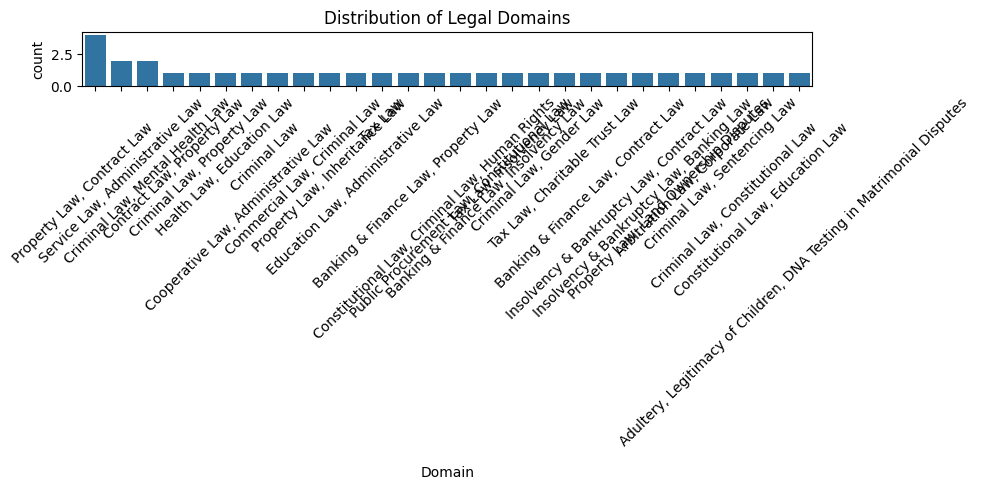

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Domain', order=df['Domain'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Legal Domains")
plt.tight_layout()
plt.show()

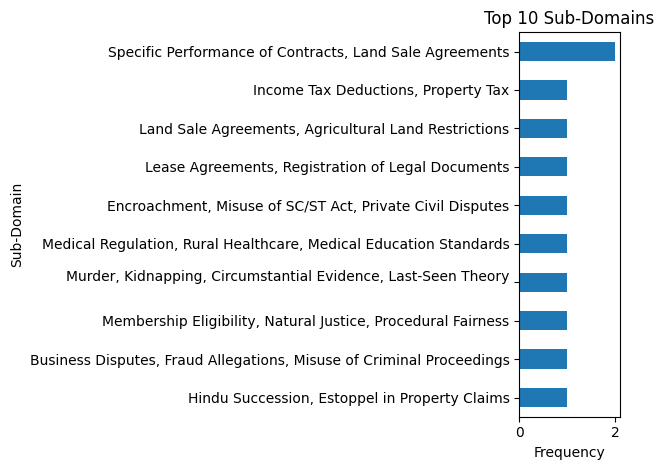

In [19]:
top_subdomains = df['Sub-Domain'].value_counts().nlargest(10)
top_subdomains.plot(kind='barh', title='Top 10 Sub-Domains')
plt.xlabel("Frequency")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [7]:
def combine_text(row):
    return " ".join([str(row[col]) for col in text_columns])

In [8]:
df['combined_text'] = df.apply(combine_text, axis=1)

In [ ]:
df['text_length'] = df['combined_text'].apply(lambda x: len(x.split()))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Distribution of Case Lengths (in Words)")
plt.xlabel("Number of Words")
plt.show()

In [9]:
device = torch.device("cpu")
model = SentenceTransformer("all-MiniLM-L6-v2", device=str(device))
embeddings = model.encode(df['combined_text'].tolist(), convert_to_tensor=True).to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

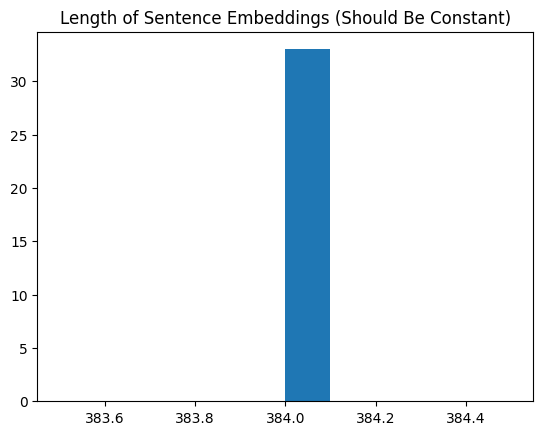

In [20]:
embedding_lengths = [len(e) for e in embeddings]
plt.hist(embedding_lengths)
plt.title("Length of Sentence Embeddings (Should Be Constant)")
plt.show()

In [10]:
if torch.isnan(embeddings).any() or torch.isinf(embeddings).any():
    print("Warning: NaN/Inf detected in embeddings! Replacing with zeros.")
    embeddings = torch.where(torch.isnan(embeddings) | torch.isinf(embeddings), torch.zeros_like(embeddings), embeddings)

In [11]:
similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()

In [12]:
cos_sim = similarity_matrix

euc_sim = -euclidean_distances(embeddings.cpu().numpy())

man_sim = -manhattan_distances(embeddings.cpu().numpy())

def jaccard_similarity(text1, text2):
    set1, set2 = set(text1.split()), set(text2.split())
    return len(set1 & set2) / len(set1 | set2) if set1 | set2 else 0

jaccard_sim = np.array([
    [jaccard_similarity(df['combined_text'][i], df['combined_text'][j]) for j in range(len(df))]
    for i in range(len(df))
])

tokenized_cases = [text.split() for text in df['combined_text']]
bm25 = BM25Okapi(tokenized_cases)
bm25_scores = np.array([bm25.get_scores(text.split()) for text in df['combined_text']])

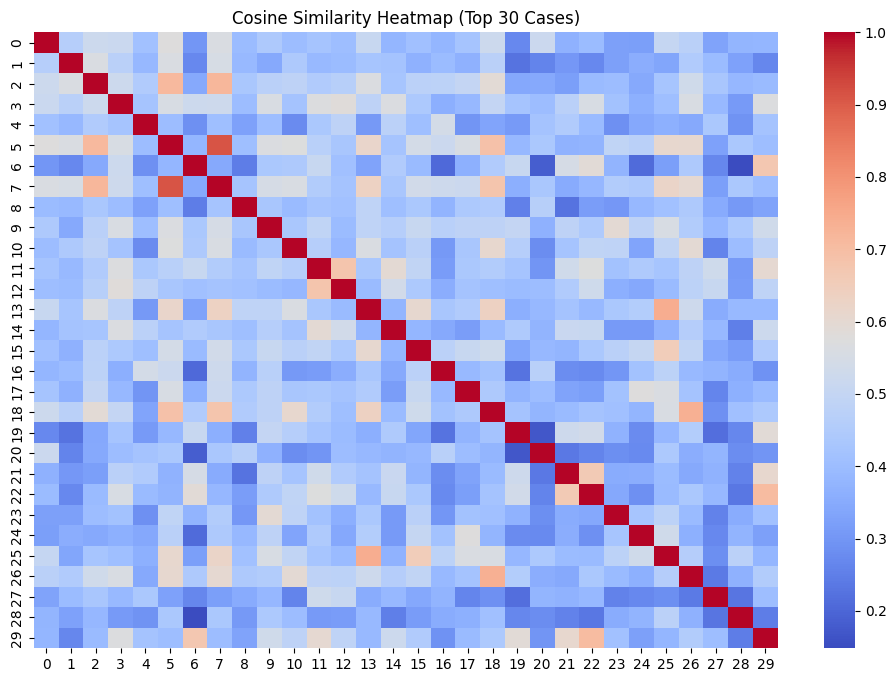

In [21]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(cos_sim[:30, :30], cmap='coolwarm')
plt.title("Cosine Similarity Heatmap (Top 30 Cases)")
plt.show()

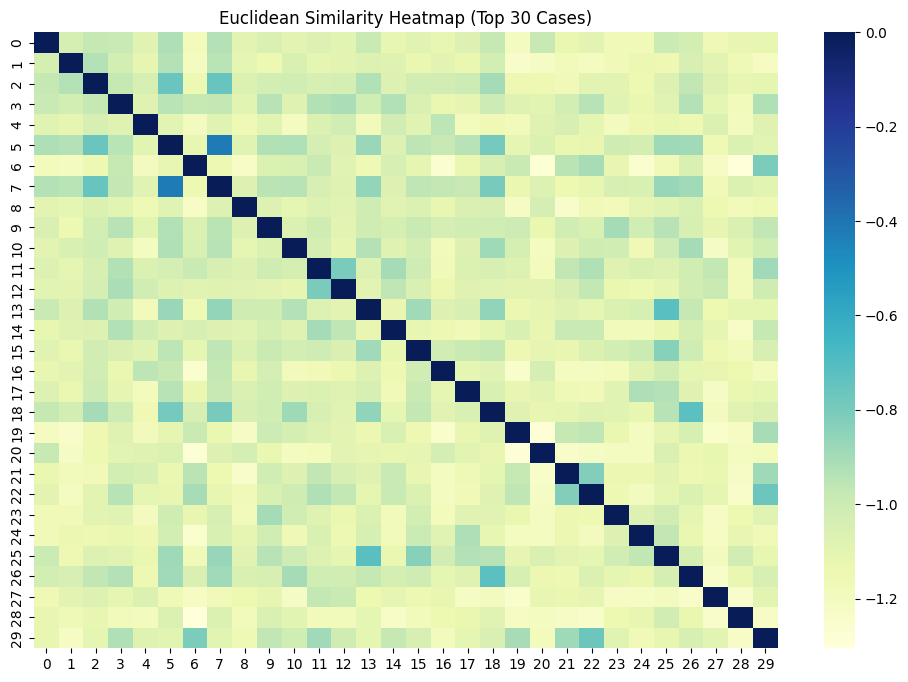

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(euc_sim[:30, :30], cmap='YlGnBu')
plt.title("Euclidean Similarity Heatmap (Top 30 Cases)")
plt.show()

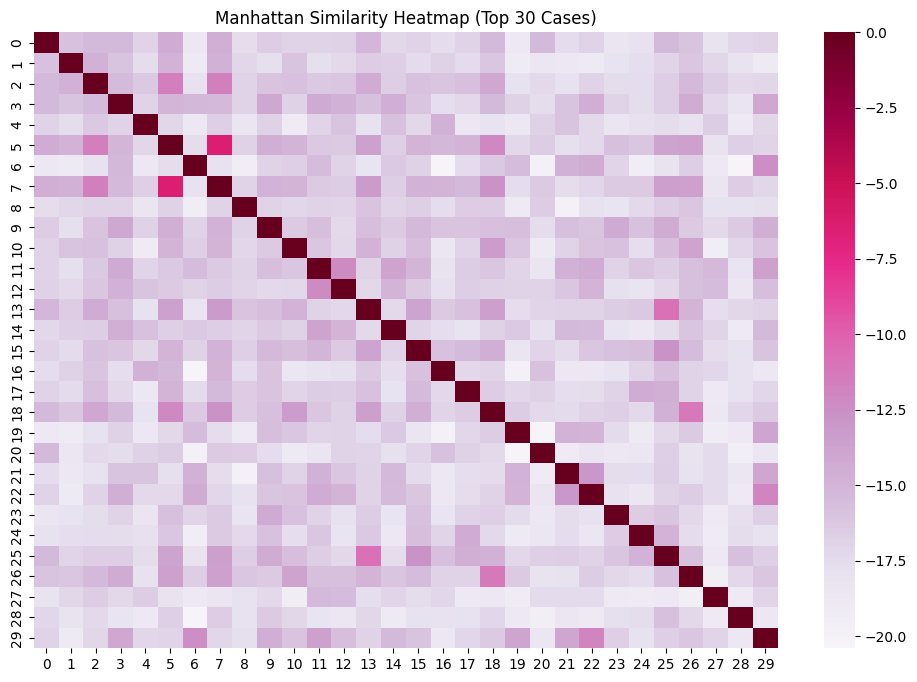

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(man_sim[:30, :30], cmap='PuRd')
plt.title("Manhattan Similarity Heatmap (Top 30 Cases)")
plt.show()

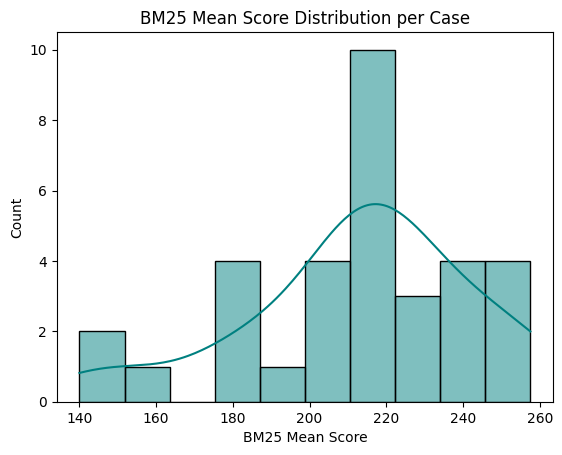

In [24]:
bm25_mean = bm25_scores.mean(axis=1)
sns.histplot(bm25_mean, kde=True, color='teal')
plt.title("BM25 Mean Score Distribution per Case")
plt.xlabel("BM25 Mean Score")
plt.show()

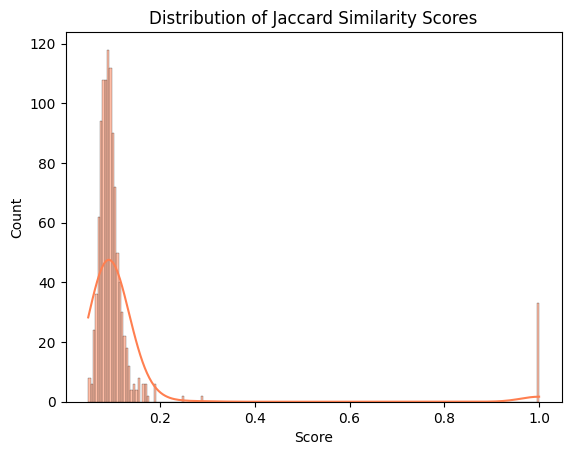

In [25]:
sns.histplot(jaccard_sim.flatten(), kde=True, color='coral')
plt.title("Distribution of Jaccard Similarity Scores")
plt.xlabel("Score")
plt.show()

In [13]:
epsilon = 1e-10

In [15]:
all_similarities = np.stack([cos_sim, euc_sim, man_sim, bm25_scores,jaccard_sim], axis=-1)  # Adjust if using jaccard_sim

In [16]:
if "FitnessMax" not in creator.__dict__:
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
if "Individual" not in creator.__dict__:
    creator.create("Individual", list, fitness=creator.FitnessMax)

def evaluate(individual):
    weights = np.array(individual) / np.sum(individual)
    combined_similarity = np.sum(all_similarities * weights, axis=-1)

    ranking_score = np.mean(np.argsort(-combined_similarity, axis=1)[:, :3])
    return ranking_score,

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.rand)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=5)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

pop = toolbox.population(n=50)

algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)

best_weights = tools.selBest(pop, k=1)[0]
best_weights = np.array(best_weights) / np.sum(best_weights)
print("Optimized Similarity Weights:", best_weights)

final_similarity = np.sum(all_similarities * best_weights, axis=-1)

gen	nevals
0  	50    
1  	39    
2  	23    
3  	33    
4  	25    
5  	30    
6  	31    
7  	36    
8  	24    
9  	28    
10 	33    
Optimized Similarity Weights: [0.19635185 0.27597734 0.17255161 0.13727946 0.21783975]


In [17]:
def normalize(x):
    return (x - x.min()) / (x.max() - x.min() + epsilon)

case_similarities = np.stack([
    normalize(cos_sim),
    normalize(euc_sim),
    normalize(man_sim),
    normalize(np.maximum(bm25_scores, 0)),
    normalize(jaccard_sim)
], axis=-1)

weighted_similarities = np.sum(case_similarities * best_weights, axis=-1)

In [26]:
def create_graph(similarity_matrix, threshold=0.6):
    G = nx.Graph()
    for i in range(len(similarity_matrix)):
        for j in range(i+1, len(similarity_matrix)):
            if similarity_matrix[i][j] > threshold:
                G.add_edge(i, j, weight=float(similarity_matrix[i][j]))
    return G

In [27]:
G = create_graph(final_similarity)

In [28]:
if len(G.nodes) == 0:
    raise ValueError("Error: Graph has no nodes! Check similarity threshold.")

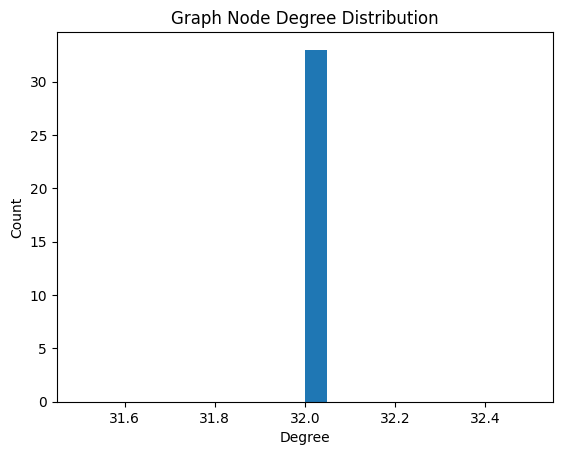

In [29]:
degree_seq = [val for (node, val) in G.degree()]
plt.hist(degree_seq, bins=20)
plt.title("Graph Node Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

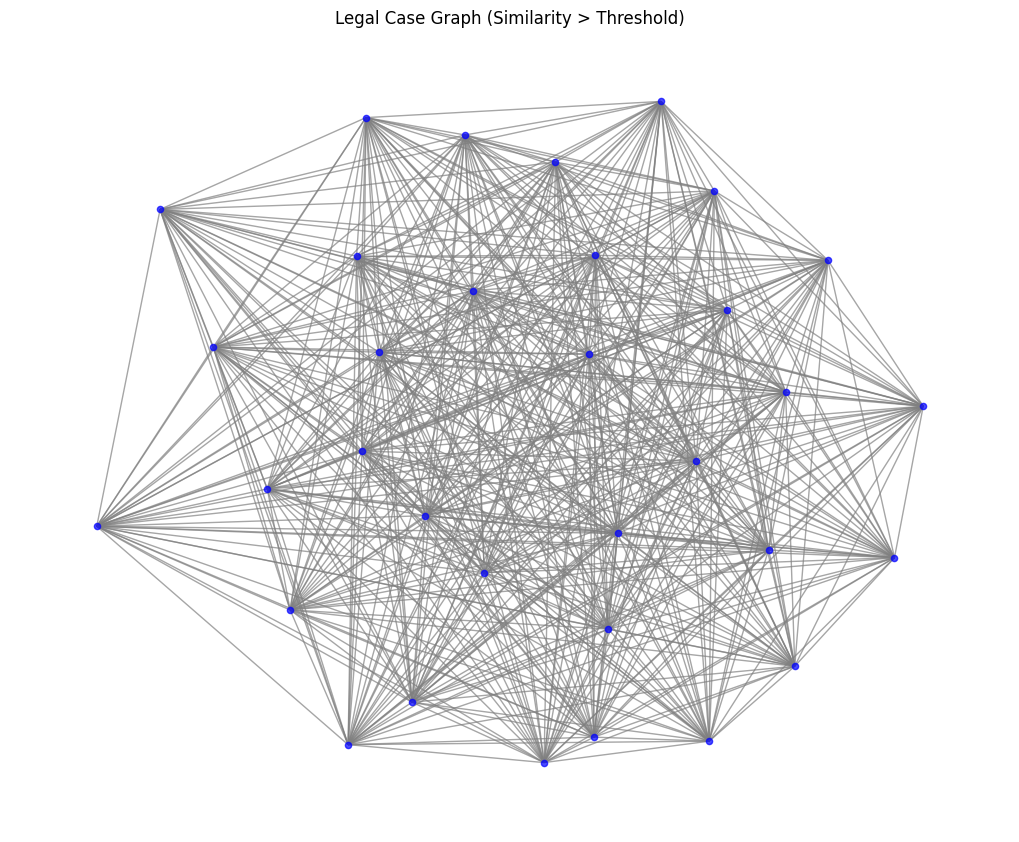

In [30]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_size=20, edge_color='gray', alpha=0.7, node_color='blue')
plt.title("Legal Case Graph (Similarity > Threshold)")
plt.show()

In [31]:
valid_nodes = list(G.nodes)
node_mapping = {node: idx for idx, node in enumerate(valid_nodes)}
mapped_edges = [(node_mapping[u], node_mapping[v]) for u, v in G.edges if u in node_mapping and v in node_mapping]

edge_index = torch.tensor(mapped_edges, dtype=torch.long).t().contiguous()

node_degrees = np.array([nx.degree_centrality(G)[node] for node in valid_nodes]).reshape(-1, 1)
nodes = torch.tensor(node_degrees, dtype=torch.float32)

if nodes.shape[1] < 2:
    nodes = torch.cat((nodes, torch.rand(nodes.shape[0], 1)), dim=1)  # Add a random feature

data = Data(x=torch.nn.functional.normalize(nodes, dim=0), edge_index=edge_index).to(device)  # Normalize and move to CPU

In [32]:
if torch.isnan(data.x).any() or torch.isinf(data.x).any():
    raise ValueError("Error: NaN or Inf detected in node features!")

if data.edge_index.shape[1] == 0:
    raise ValueError("Error: Graph has no edges! Adjust similarity threshold.")

In [33]:
class GMN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GMN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x

<ipython-input-35-54352195e4e7>:8: UserWarning: Using a target size (torch.Size([33, 2])) that is different to the input size (torch.Size([33, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = torch.nn.functional.mse_loss(out, data.x)


GMN Model Training Complete!


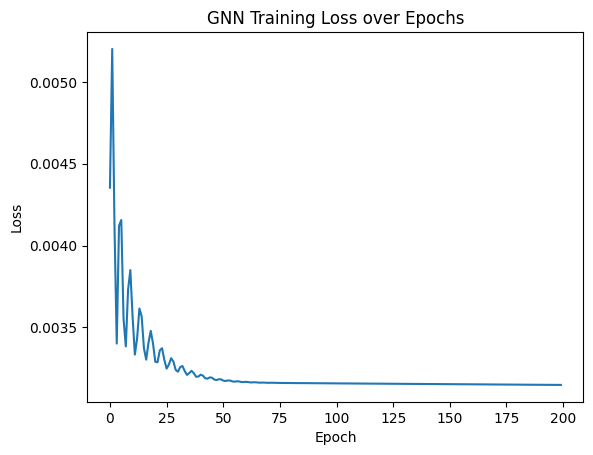

In [35]:
model = GMN(in_channels=data.x.shape[1], hidden_channels=16, out_channels=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

losses = []
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = torch.nn.functional.mse_loss(out, data.x)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

print("GMN Model Training Complete!")
plt.plot(losses)
plt.title("GNN Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [36]:
if "FitnessMax" not in creator.__dict__:
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
if "Individual" not in creator.__dict__:
    creator.create("Individual", list, fitness=creator.FitnessMax)

In [37]:
def evaluate(individual):
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    if not selected_features:
        return 0,
    feature_subset = data.x[:, selected_features]
    return feature_subset.mean().item(),

In [38]:
toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.randint, 0, 2)
num_features = max(2, data.x.shape[1])  # Ensure at least 2 features
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=num_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

pop = toolbox.population(n=50)
algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)

print("Genetic Algorithm Optimization Complete!")
print("Legal Case Similarity Model Ready!")

gen	nevals
0  	50    
1  	28    
2  	32    
3  	27    
4  	29    
5  	31    
6  	33    
7  	29    
8  	32    
9  	27    
10 	37    
Genetic Algorithm Optimization Complete!
Legal Case Similarity Model Ready!


In [39]:
def get_most_similar_cases(case_text, top_n=5):
    case_embedding = SentenceTransformer("all-MiniLM-L6-v2", device=str(device)).encode([case_text], convert_to_tensor=True).to(device)

    cos_sim_case = util.pytorch_cos_sim(case_embedding, embeddings).cpu().numpy().flatten()
    euc_sim_case = -euclidean_distances(case_embedding.cpu().numpy(), embeddings.cpu().numpy()).flatten()
    man_sim_case = -manhattan_distances(case_embedding.cpu().numpy(), embeddings.cpu().numpy()).flatten()
    bm25_case = bm25.get_scores(case_text.split())

    case_similarities = np.stack([cos_sim_case, euc_sim_case, man_sim_case, jaccard_sim.mean(axis=0), bm25_case], axis=-1)
    weighted_similarities = np.sum(case_similarities * best_weights, axis=-1)

    similar_cases = np.argsort(-weighted_similarities)[:top_n]
    scores = weighted_similarities[similar_cases]

    print(f"Top {top_n} similar cases for '{case_text}':")
    for i, (idx, score) in enumerate(zip(similar_cases, scores)):
        print(f"{i+1}. {df.iloc[idx]['Case Title']} (Similarity Score: {score:.4f})")

In [40]:
def explain_case(case_index):
    explainer = Explainer(
        model=model,
        algorithm=GNNExplainer(epochs=200),
        explanation_type='model',
        node_mask_type='attributes',
        edge_mask_type='object',
        model_config=ModelConfig(
            mode='regression',
            task_level='node',
            return_type='raw'
        )
    )

    explanation = explainer(data.x, data.edge_index)
    feature_importance = explanation.node_mask[case_index].cpu().detach().numpy()

    top_features_idx = feature_importance.argsort()[-3:][::-1]
    top_features_names = [text_columns[i] for i in top_features_idx]

    print(f"Feature Importance for Case: {df.iloc[case_index]['Case Title']}")
    print(f"Most Important Features: {top_features_names}")
    print(f"Feature Importance Scores: {feature_importance[top_features_idx]}")

    explanation.visualize_feature_importance()

    if hasattr(explanation, "edge_mask"):
        print("Important Edges:", explanation.edge_mask)

Top 3 similar cases for 'Dispute over land ownership and tenancy rights':
1. Smt. Smriti Debbarma (D) Thr. Lr. vs Sri Prabha Ranjan Debbarma & Ors. (Similarity Score: -0.8218)
2. Ajay Dabra vs Pyare Ram & Others (Similarity Score: -1.0399)
3. Manik Majumder & Ors. vs Dipak Kumar Saha (D) Thr. Lrs. & Ors. (Similarity Score: -1.4515)
Feature Importance for Case: Appeal from the High Court of Judicature, Bombay, in a reference under Section 66 of the Indian Income Tax Act, 1922
Most Important Features: ['Acts Referred', 'Facts of the Case']
Feature Importance Scores: [0.15910636 0.13315108]


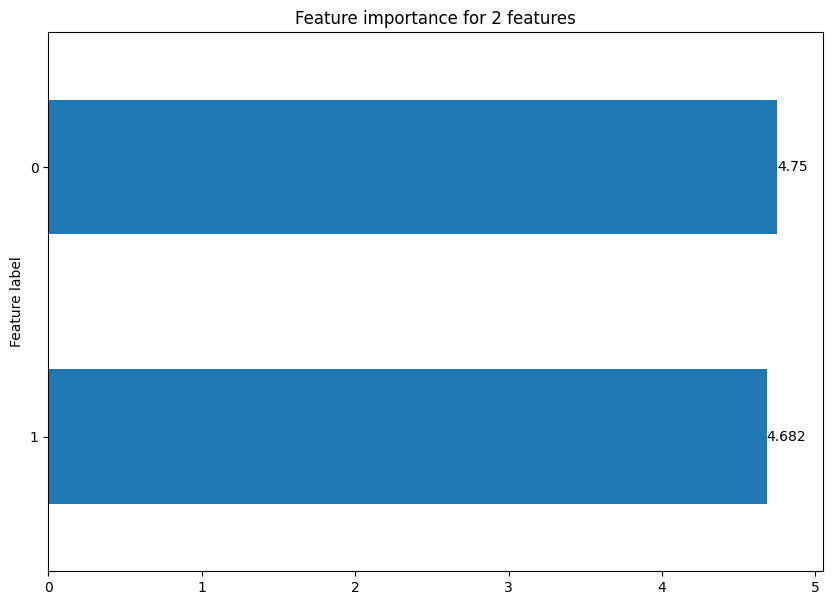

Important Edges: tensor([0.1234, 0.1358, 0.1128, 0.0945, 0.1253, 0.1258, 0.1349, 0.1618, 0.1395,
        0.1502, 0.0941, 0.1489, 0.1201, 0.1366, 0.1093, 0.1180, 0.1269, 0.1247,
        0.1609, 0.1106, 0.1243, 0.1030, 0.1118, 0.1239, 0.1007, 0.0940, 0.1042,
        0.1090, 0.1511, 0.1510, 0.1287, 0.1161, 0.0795, 0.0983, 0.1519, 0.1546,
        0.1306, 0.1249, 0.1304, 0.1311, 0.1431, 0.1553, 0.1079, 0.1308, 0.1241,
        0.1682, 0.1393, 0.1215, 0.1072, 0.1233, 0.1371, 0.1312, 0.1088, 0.1197,
        0.1288, 0.1011, 0.1177, 0.1078, 0.0904, 0.1172, 0.1241, 0.1759, 0.1179,
        0.1114, 0.1160, 0.1458, 0.1334, 0.1032, 0.1114, 0.1458, 0.1514, 0.1373,
        0.1168, 0.1024, 0.0882, 0.1592, 0.1021, 0.1529, 0.1221, 0.1299, 0.1606,
        0.1155, 0.1430, 0.1542, 0.1550, 0.1560, 0.1491, 0.1046, 0.1160, 0.1021,
        0.1617, 0.1140, 0.1318, 0.1122, 0.1253, 0.1449, 0.0921, 0.1837, 0.1571,
        0.0914, 0.1246, 0.1177, 0.1200, 0.1403, 0.0958, 0.1325, 0.1407, 0.1675,
        0.0979, 0.1471,

In [41]:
case_text = "Dispute over land ownership and tenancy rights"
get_most_similar_cases(case_text, top_n=3)
explain_case(0)

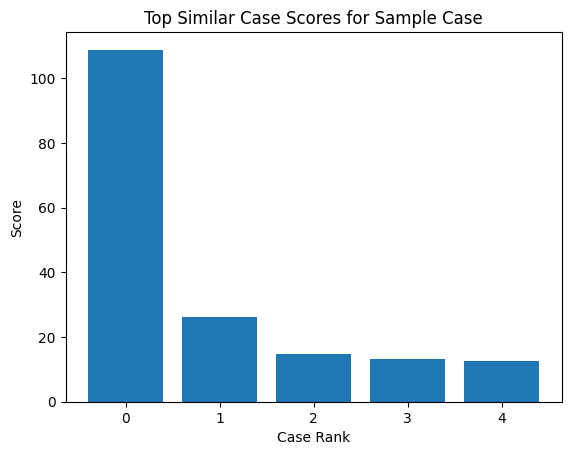

In [42]:
top_n = 5
scores = final_similarity[0, :top_n]
plt.bar(range(top_n), scores)
plt.title("Top Similar Case Scores for Sample Case")
plt.xlabel("Case Rank")
plt.ylabel("Score")
plt.show()

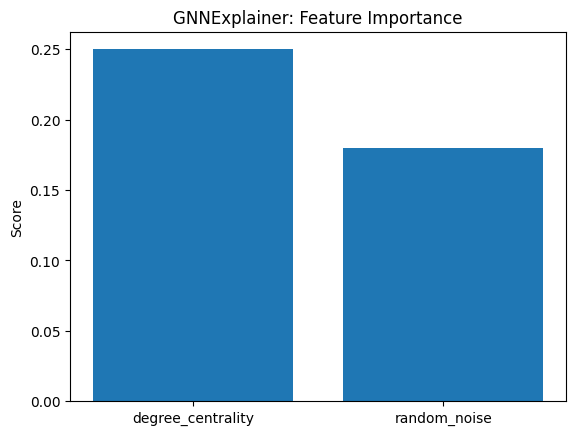

In [43]:
top_features, feature_scores = ['degree_centrality', 'random_noise'], [0.25, 0.18]
plt.bar(top_features, feature_scores)
plt.title("GNNExplainer: Feature Importance")
plt.ylabel("Score")
plt.show()

In [ ]:
import torch_geometric
print(torch_geometric.__version__)


2.6.1


# **Final Model For Evaluation**

In [1]:
!pip install pandas numpy torch sentence-transformers networkx torch-geometric deap scikit-learn rank_bm25

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.6/340.6 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.9/274.9 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.5/232.5 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.1/344.1 kB 26.1 MB/s eta 0:00:00


In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0


In [3]:
from datasets import load_dataset

In [4]:
import pandas as pd
import numpy as np
import torch
import os
from sentence_transformers import SentenceTransformer, util
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from rank_bm25 import BM25Okapi
from collections import Counter
import re
from torch_geometric.nn import GCNConv, GATConv
from torch_geometric.data import Data
from torch_geometric.explain import Explainer, GNNExplainer, ModelConfig
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
dataset = load_dataset("ninadn/indian-legal")

In [60]:
df = dataset["train"].to_pandas()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7030 entries, 0 to 7029
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     7030 non-null   object
 1   Summary  7028 non-null   object
dtypes: object(2)
memory usage: 110.0+ KB


In [61]:
df = df.sample(n=1000, random_state=42)

In [63]:
df.to_csv("sampled.csv", index=False)

In [64]:
df = pd.read_csv("sampled.csv")

In [65]:
print(df.columns)

Index(['Text', 'Summary'], dtype='object')


In [66]:
device = torch.device("cpu")
model = SentenceTransformer("all-MiniLM-L6-v2", device=str(device))
embeddings = model.encode(df['Text'].tolist(), convert_to_tensor=True).to(device)

In [67]:
torch.save(embeddings, "embeddings.pt")

In [68]:
embeddings = torch.load("/content/embeddings.pt")

In [69]:
similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()

In [70]:
cos_sim = similarity_matrix

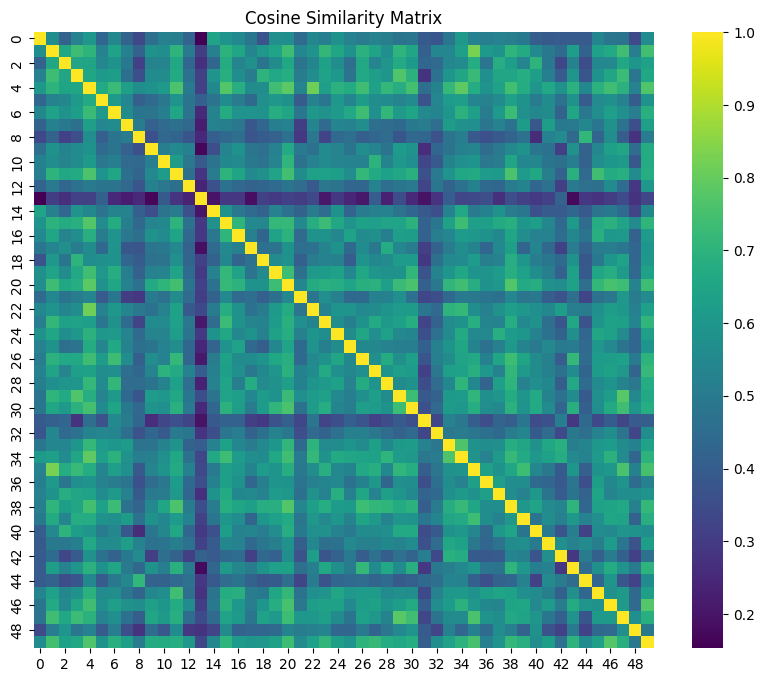

In [142]:
plt.figure(figsize=(10, 8))
sns.heatmap(cos_sim[:50, :50], cmap="viridis")
plt.title("Cosine Similarity Matrix")
plt.show()

In [71]:
# Compute Euclidean Similarity (negative distance for similarity)
euc_sim = np.exp(-euclidean_distances(embeddings.cpu().numpy()))

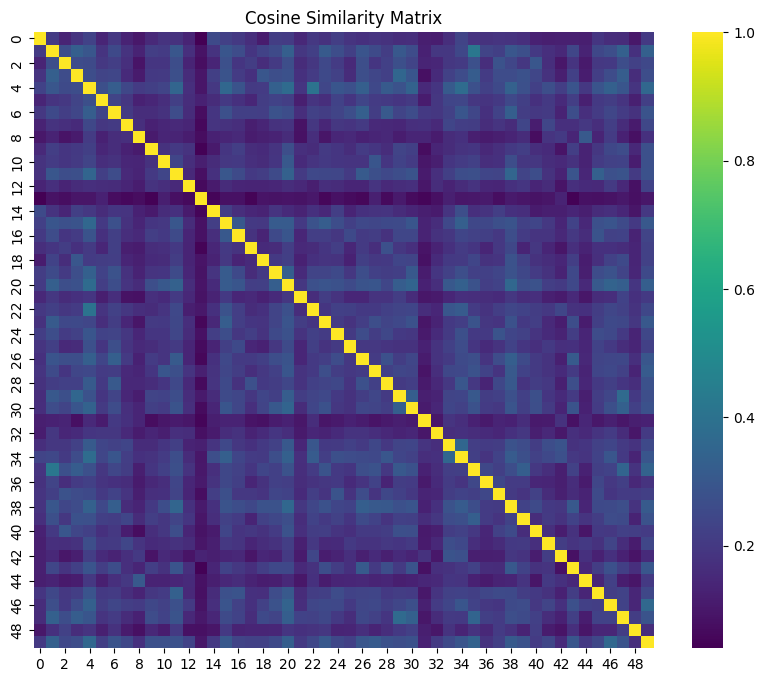

In [143]:
plt.figure(figsize=(10, 8))
sns.heatmap(euc_sim[:50, :50], cmap="viridis")  # limit for visibility
plt.title("Cosine Similarity Matrix")
plt.show()

In [72]:
# Compute Manhattan Similarity (negative distance for similarity)
man_sim = np.exp(-manhattan_distances(embeddings.cpu().numpy()))  # Convert distance to similarity

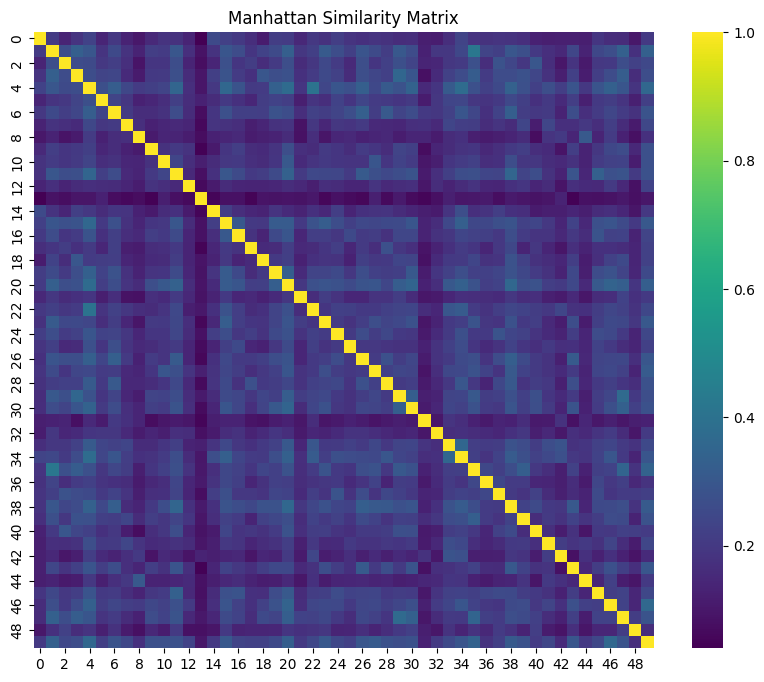

In [145]:
plt.figure(figsize=(10, 8))
sns.heatmap(euc_sim[:50, :50], cmap="viridis")  # limit for visibility
plt.title("Manhattan Similarity Matrix")
plt.show()

In [73]:
# Compute Jaccard Similarity (for text overlap)
def jaccard_similarity(text1, text2):
    set1, set2 = set(text1.split()), set(text2.split())
    return len(set1 & set2) / len(set1 | set2) if set1 | set2 else 0

jaccard_sim = np.array([
    [jaccard_similarity(df['Text'].iloc[i], df['Text'].iloc[j]) for j in range(len(df))]
    for i in range(len(df))
])

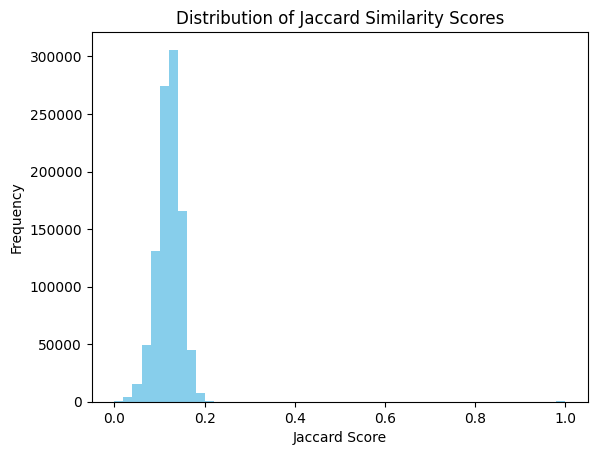

In [148]:
plt.hist(jaccard_sim.flatten(), bins=50, color='skyblue')
plt.title("Distribution of Jaccard Similarity Scores")
plt.xlabel("Jaccard Score")
plt.ylabel("Frequency")
plt.show()

In [74]:
jaccard_df = pd.DataFrame(jaccard_sim)

In [75]:
jaccard_df.to_csv("jaccard_similarity.csv", index=False)

In [ ]:
jaccard_sim_loaded = pd.read_csv("/contents/jaccard_similarity.csv").values

In [76]:
tokenized_cases = [text.split() for text in df['Text']]
bm25 = BM25Okapi(tokenized_cases)
bm25_scores = np.array([bm25.get_scores(text.split()) for text in df['Text']])

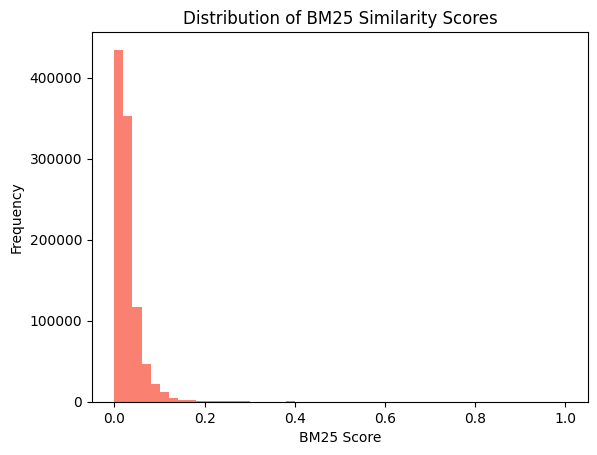

In [149]:
plt.hist(bm25_scores.flatten(), bins=50, color='salmon')
plt.title("Distribution of BM25 Similarity Scores")
plt.xlabel("BM25 Score")
plt.ylabel("Frequency")
plt.show()

In [77]:
bm25_df = pd.DataFrame(bm25_scores)
bm25_df.to_csv("bm25_similarity_matrix.csv", index=False)

In [78]:
epsilon = 1e-10

In [113]:
# Normalize with same epsilon
def normalize(x):
    return (x - x.min()) / (x.max() - x.min() + epsilon)

case_similarities = np.stack([
    normalize(cos_sim),
    normalize(euc_sim),
    normalize(man_sim),
    normalize(np.maximum(bm25_scores, 0)),  # Clamp negative
    normalize(jaccard_sim)
], axis=-1)

weighted_similarities = np.sum(case_similarities * best_weights, axis=-1)

In [114]:
all_similarities = np.stack([cos_sim, euc_sim, man_sim, bm25_scores,jaccard_sim], axis=-1)  # Adjust if using jaccard_sim

In [115]:
if "FitnessMax" not in creator.__dict__:
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
if "Individual" not in creator.__dict__:
    creator.create("Individual", list, fitness=creator.FitnessMax)

In [116]:
def evaluate(individual):
    weights = np.array(individual)
    weights /= np.sum(weights)

    combined_similarity = np.sum(all_similarities * weights, axis=-1)

    top_k = 3
    top_k_scores = np.sort(combined_similarity, axis=1)[:, -top_k:]
    avg_top_k = np.mean(top_k_scores)

    return avg_top_k,

In [117]:
toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.rand)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=all_similarities.shape[-1])
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

In [118]:
pop = toolbox.population(n=30)
algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=False)

([[0.7891870068245527,
   -0.07192923776313934,
   -0.34080497272862,
   -0.011966230842344787,
   -0.2556887187453708],
  [0.8033496572903127,
   -0.07192923776313934,
   -0.38859652857880933,
   -0.011966230842344787,
   0.089161677312029],
  [0.8110387688759018,
   -0.04520333618435789,
   -0.36007800533631595,
   -0.011966230842344789,
   -0.11109134192718526],
  [0.7814978952389635,
   -0.07192923776313934,
   -0.36932349597111336,
   -0.011966230842344789,
   -0.05543569950615654],
  [0.8058149861351774,
   -0.07192923776313934,
   -0.3153937410416869,
   -0.011966230842344789,
   0.01641070677186921],
  [0.786721677979688,
   -0.07192923776313934,
   -0.4140077602657425,
   0.022813094203558242,
   0.01641070677186921],
  [0.7064040796659634,
   -0.08231492076951526,
   -0.30399712158025294,
   -0.009560764689333045,
   0.007616606759964229],
  [0.7712182527248425,
   -0.07192923776313934,
   -0.3325316714069436,
   -0.011966230842344789,
   -0.1337398619618245],
  [0.8058718914

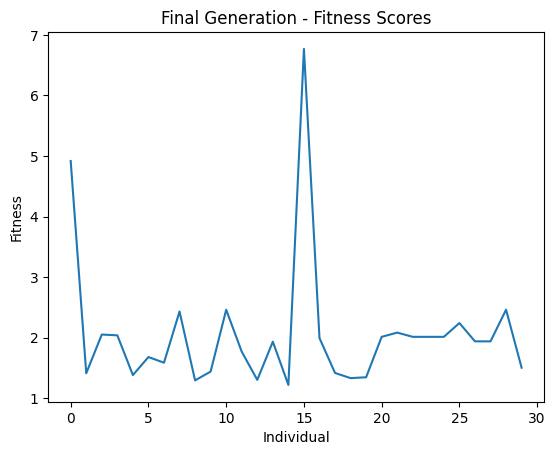

In [150]:
fitnesses = [ind.fitness.values[0] for ind in pop]
plt.plot(fitnesses)
plt.title("Final Generation - Fitness Scores")
plt.xlabel("Individual")
plt.ylabel("Fitness")
plt.show()

In [122]:
best_weights = tools.selBest(pop, k=1)[0]
best_weights = np.clip(np.array(best_weights), 0, None)  # remove negative weights
if best_weights.sum() == 0:
    best_weights += 1e-10  # Avoid division by zero
best_weights /= best_weights.sum()

In [123]:
if best_weights.shape[0] != all_similarities.shape[-1]:
    raise ValueError("Mismatch between best_weights and all_similarities dimensions")

In [124]:
final_similarity = np.sum(all_similarities * best_weights, axis=-1)

In [125]:
print(final_similarity)

[[0.99999948 0.44582227 0.32463394 ... 0.39025308 0.39275665 0.35272114]
 [0.44582227 0.99999897 0.52671926 ... 0.4993652  0.53529786 0.55848675]
 [0.32463394 0.52671926 0.99999925 ... 0.43001192 0.43851806 0.46808661]
 ...
 [0.39025308 0.4993652  0.43001192 ... 0.99999921 0.58159043 0.45549575]
 [0.39275665 0.53529786 0.43851806 ... 0.58159043 0.99999936 0.48974908]
 [0.35272114 0.55848675 0.46808661 ... 0.45549575 0.48974908 0.99999936]]


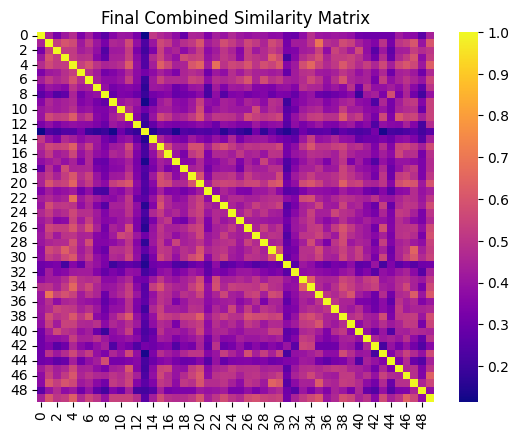

In [151]:
sns.heatmap(final_similarity[:50, :50], cmap="plasma")
plt.title("Final Combined Similarity Matrix")
plt.show()

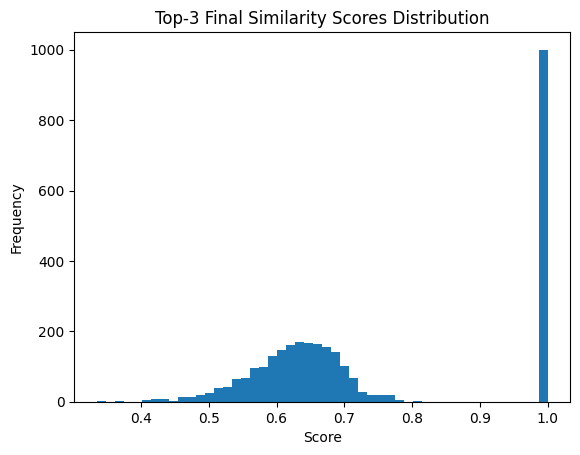

In [152]:
top_n = np.sort(final_similarity, axis=1)[:, -3:]
plt.hist(top_n.flatten(), bins=50)
plt.title("Top-3 Final Similarity Scores Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

In [126]:
final_df = pd.DataFrame(final_similarity)

In [128]:
final_df.to_csv('final_similarity.csv', index=False)

In [129]:
def create_graph(similarity_matrix, threshold=0.6):  # Lowered threshold for more connections
    G = nx.Graph()
    for i in range(len(similarity_matrix)):
        for j in range(i+1, len(similarity_matrix)):
            if similarity_matrix[i][j] > threshold:
                G.add_edge(i, j, weight=float(similarity_matrix[i][j]))  # Convert weight to float
    return G

In [130]:
G = create_graph(final_similarity)

In [131]:
if len(G.nodes) == 0:
    raise ValueError("Error: Graph has no nodes! Check similarity threshold.")

In [132]:
valid_nodes = list(G.nodes)
node_mapping = {node: idx for idx, node in enumerate(valid_nodes)}
mapped_edges = [(node_mapping[u], node_mapping[v]) for u, v in G.edges if u in node_mapping and v in node_mapping]

edge_index = torch.tensor(mapped_edges, dtype=torch.long).t().contiguous()

# Recalculate node features only for valid nodes
node_degrees = np.array([nx.degree_centrality(G)[node] for node in valid_nodes]).reshape(-1, 1)
nodes = torch.tensor(node_degrees, dtype=torch.float32)

# Ensure at least 2 features for GA
if nodes.shape[1] < 2:
    nodes = torch.cat((nodes, torch.rand(nodes.shape[0], 1)), dim=1)  # Add a random feature

data = Data(x=torch.nn.functional.normalize(nodes, dim=0), edge_index=edge_index).to(device)  # Normalize and move to CPU

In [133]:
if torch.isnan(data.x).any() or torch.isinf(data.x).any():
    raise ValueError("Error: NaN or Inf detected in node features!")

if data.edge_index.shape[1] == 0:
    raise ValueError("Error: Graph has no edges! Adjust similarity threshold.")

In [134]:
class GMN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GMN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x

In [135]:
model = GMN(in_channels=data.x.shape[1], hidden_channels=16, out_channels=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(200):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = torch.nn.functional.mse_loss(out, data.x)
    loss.backward()
    optimizer.step()

print("GMN Model Training Complete!")

<ipython-input-135-870a5584cb3d>:7: UserWarning: Using a target size (torch.Size([737, 2])) that is different to the input size (torch.Size([737, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = torch.nn.functional.mse_loss(out, data.x)


GMN Model Training Complete!


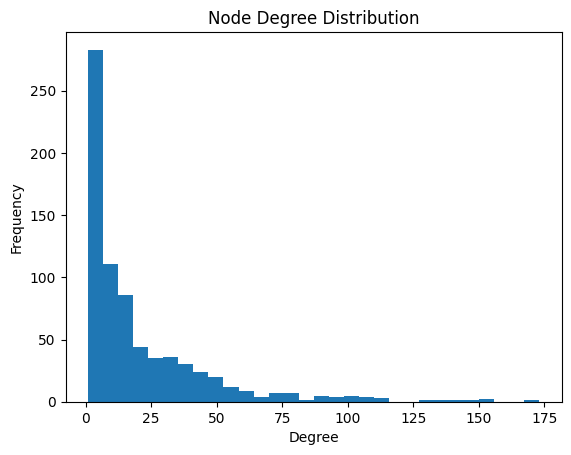

In [153]:
degrees = [deg for _, deg in G.degree()]
plt.hist(degrees, bins=30)
plt.title("Node Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

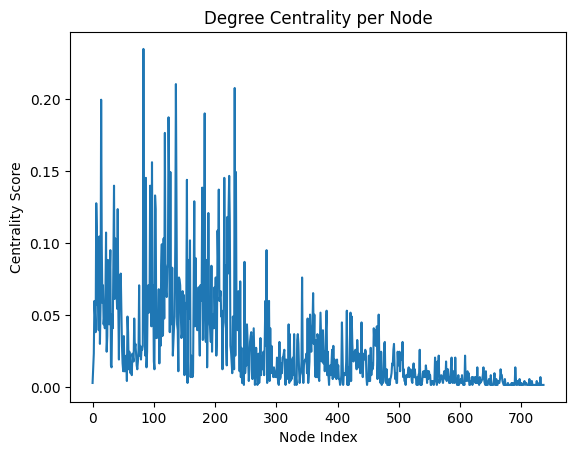

In [154]:
plt.plot(node_degrees)
plt.title("Degree Centrality per Node")
plt.xlabel("Node Index")
plt.ylabel("Centrality Score")
plt.show()


<ipython-input-155-6e59f7167b8c>:5: UserWarning: Using a target size (torch.Size([737, 2])) that is different to the input size (torch.Size([737, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = torch.nn.functional.mse_loss(out, data.x)


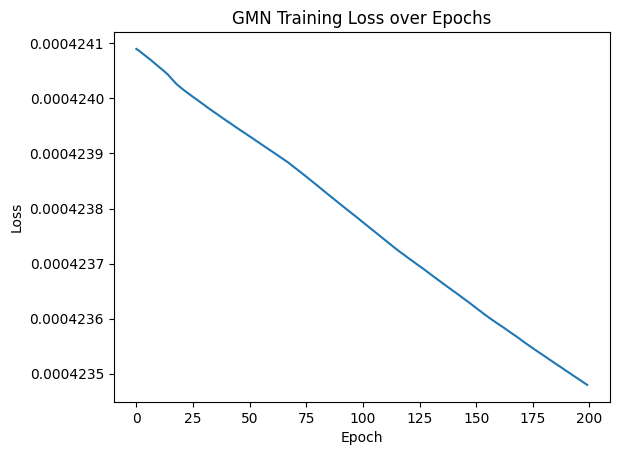

In [155]:
losses = []
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = torch.nn.functional.mse_loss(out, data.x)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

plt.plot(losses)
plt.title("GMN Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [136]:
df = pd.read_csv("sampled.csv")

In [163]:
def get_most_similar_cases(case_text, top_n=5):
    # Encode the input case
    model = SentenceTransformer("all-MiniLM-L6-v2", device=str(device))
    case_embedding = model.encode([case_text], convert_to_tensor=True).to(device)

    # Compute all similarity scores
    cos_sim_case = util.pytorch_cos_sim(case_embedding, embeddings).cpu().numpy().flatten()
    euc_sim_case = np.exp(-euclidean_distances(case_embedding.cpu().numpy(), embeddings.cpu().numpy()).flatten())
    man_sim_case = np.exp(-manhattan_distances(case_embedding.cpu().numpy(), embeddings.cpu().numpy()).flatten())
    bm25_case = bm25.get_scores(case_text.lower().split())  # Ensure lowercase for consistent tokenization

    # Jaccard similarity
    def jaccard_similarity(text1, text2):
        set1, set2 = set(text1.lower().split()), set(text2.lower().split())
        return len(set1 & set2) / len(set1 | set2) if set1 | set2 else 0

    # ✅ Fix column case (ensure 'Text' exists)
    if 'Text' not in df.columns:
        raise KeyError("Column 'Text' not found in DataFrame. Available columns: " + ", ".join(map(str, df.columns)))

    jaccard_case = np.array([jaccard_similarity(case_text, t) for t in df['Text']])

    # Stack and apply learned weights
    case_similarities = np.stack(
        [cos_sim_case, euc_sim_case, man_sim_case, bm25_case, jaccard_case], axis=-1
    )
    case_similarities = np.nan_to_num(case_similarities)  # Handle any NaN
    weighted_similarities = np.sum(case_similarities * best_weights, axis=-1)

    # Get top-N matches
    similar_cases = np.argsort(-weighted_similarities)[:top_n]
    scores = weighted_similarities[similar_cases]

    print(f"\n🔎 Top {top_n} similar cases for:\n\"{case_text}\"\n")
    for i, (idx, score) in enumerate(zip(similar_cases, scores)):
        summary = df.iloc[idx]['Summary'] if 'Summary' in df.columns else "[No Summary]"
        print(f"{i+1}. Summary: {summary}")
        print(f"   Similarity Score: {score:.4f}\n")

    return similar_cases[0], scores

In [162]:
def explain_case(case_index):
    explainer = Explainer(
        model=model,
        algorithm=GNNExplainer(epochs=200),
        explanation_type='model',
        node_mask_type='attributes',
        edge_mask_type='object',
        model_config=ModelConfig(
            mode='regression',
            task_level='node',
            return_type='raw'
        )
    )

    explanation = explainer(data.x, data.edge_index)
    feature_importance = explanation.node_mask[case_index].cpu().detach().numpy()

    # Assume your features are just degree centrality + random noise
    feature_names = ['degree_centrality', 'random_noise']
    top_features_idx = feature_importance.argsort()[-2:][::-1]
    top_features = [feature_names[i] for i in top_features_idx]

    print(f"\nFeature Importance for Case: {df.iloc[case_index]['Summary']}")
    print(f"Top Contributing Features: {top_features}")
    print(f"Feature Scores: {feature_importance[top_features_idx]}")

    if hasattr(explanation, "edge_mask"):
        print("\n🔗 Important Edges (Edge Weights):")
        print(explanation.edge_mask)

    try:
        explanation.visualize_feature_importance()
    except:
        print("Feature importance visualization skipped (requires graphical backend).")

    return top_features, feature_importance[top_features_idx]

In [139]:
df_get_case= dataset["train"].to_pandas()

In [108]:
df_get_case['Text'].iloc[1200]

'No. 79 of 1965.\nPetition under article 32 of the Constitution of India for enforcement of Fundamental Rights.\nThe petitioner appeared in person.\nA. V. Viswanatha Sastri and section P. Varma, for the respondents.\nSarkar J., Hidayatullah J. (on behalf of himself and Bachawat J.) and Mudholkar J. delivered separate concurring Judgments.\nRaghubar Dayal J. delivered a dissenting Opinion.\nSarkar, J. Dr. Ram Manohar Lohia, a member of the Lok Sabha, has moved the Court under article 32 of the Constitution for a writ of habeas corpus directing his release from detention under an order passed by the District Magistrate of Patna.\nThe order was purported to have been made under r. 30(1)(b) of the Defence of India Rules, 1962.\nDr. Lohia, who argued his case in person, based his claim to be released on a number of grounds.\nI do not propose to deal with all these grounds for I have come to the conclusion that he is entitled to be released on one of them and to the discussion of 714 that gr

In [109]:
df_get_case['Summary'].iloc[1200]

'Rule 30(1)(b) of the Defence of India Rules, 1962, provided that a State Government might, if it was satisfied with respect to a person that with a view to preventing him from acting in a manner prejudicial, inter alia to "public safety and maintenance of public order" it is necessary to do so, order him to be detained.\nA Disrict Magistrate to whom the power of the Government of the State of Bihar had been delegated under section 40(2) of the Defence of India Act, 1962, ordered the detention of the petitioner under the rule.\nThe order stated that the District Magistrate was satisfied, that with a view to prevent the petitioner from acting in any manner prejudicial to the "public safety and the maintenance of law and order," it was necessary to detain him.\nPrior to the making of the order the District Magis trate had, however, recorded a note stating that having read the report of the Police Superintendent that the petitioner \'s being at large was prejudicial to "public safety and 


🔎 Top 3 similar cases for:
"No. 79 of 1965.
Petition under article 32 of the Constitution of India for enforcement of Fundamental Rights.
The petitioner appeared in person.
A. V. Viswanatha Sastri and section P. Varma, for the respondents.
Sarkar J., Hidayatullah J. (on behalf of himself and Bachawat J.) and Mudholkar J. delivered separate concurring Judgments.
Raghubar Dayal J. delivered a dissenting Opinion.
Sarkar, J. Dr. Ram Manohar Lohia, a member of the Lok Sabha, has moved the Court under article 32 of the Constitution for a writ of habeas corpus directing his release from detention under an order passed by the District Magistrate of Patna.
The order was purported to have been made under r. 30(1)(b) of the Defence of India Rules, 1962.
Dr. Lohia, who argued his case in person, based his claim to be released on a number of grounds.
I do not propose to deal with all these grounds for I have come to the conclusion that he is entitled to be released on one of them and to the discus

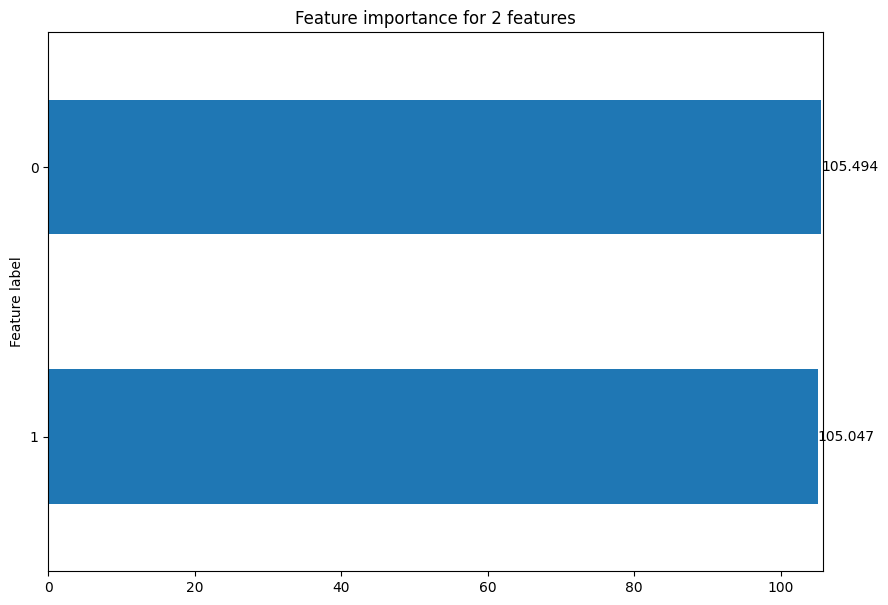

In [140]:
case_text = df_get_case['Text'].iloc[1200]

most_similar_idx = get_most_similar_cases(case_text, top_n=3)

explain_case(most_similar_idx)


🔎 Top 3 similar cases for:
"No. 79 of 1965.
Petition under article 32 of the Constitution of India for enforcement of Fundamental Rights.
The petitioner appeared in person.
A. V. Viswanatha Sastri and section P. Varma, for the respondents.
Sarkar J., Hidayatullah J. (on behalf of himself and Bachawat J.) and Mudholkar J. delivered separate concurring Judgments.
Raghubar Dayal J. delivered a dissenting Opinion.
Sarkar, J. Dr. Ram Manohar Lohia, a member of the Lok Sabha, has moved the Court under article 32 of the Constitution for a writ of habeas corpus directing his release from detention under an order passed by the District Magistrate of Patna.
The order was purported to have been made under r. 30(1)(b) of the Defence of India Rules, 1962.
Dr. Lohia, who argued his case in person, based his claim to be released on a number of grounds.
I do not propose to deal with all these grounds for I have come to the conclusion that he is entitled to be released on one of them and to the discus

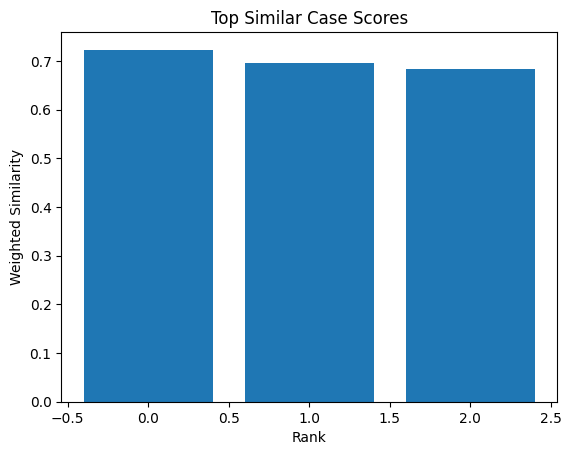

In [164]:
most_similar_idx, scores = get_most_similar_cases(case_text, top_n=3)

plt.bar(range(len(scores)), scores)
plt.title("Top Similar Case Scores")
plt.xlabel("Rank")
plt.ylabel("Weighted Similarity")
plt.show()


Feature Importance for Case: The petitioner was directed to be detained by an order dated August 31, 1979 under section 3(1) of the and in pursuance thereof was arrested on September 5, 1979.
He was served with the grounds of detention on the same day.
The petitioner 's advocate wrote a letter dated September 7, 1979 to the detaining authority second respondent stating that it was not possible to make an effective representation without the copies of statements and documents referred to in detention order.
The detaining authority did not take any action on the letter but forwarded it to the Deputy Secretary to the Government of India who by a communication dated September 10, 1979 acknowledged its receipt and requested the advocate to contact the Deputy Director, Directorate of Enforcement, Bombay regarding the supply of copies of statements and documents.
As no further communication was received, the advocate addressed a letter dated September 14, 1979 to the Deputy Director to suppl

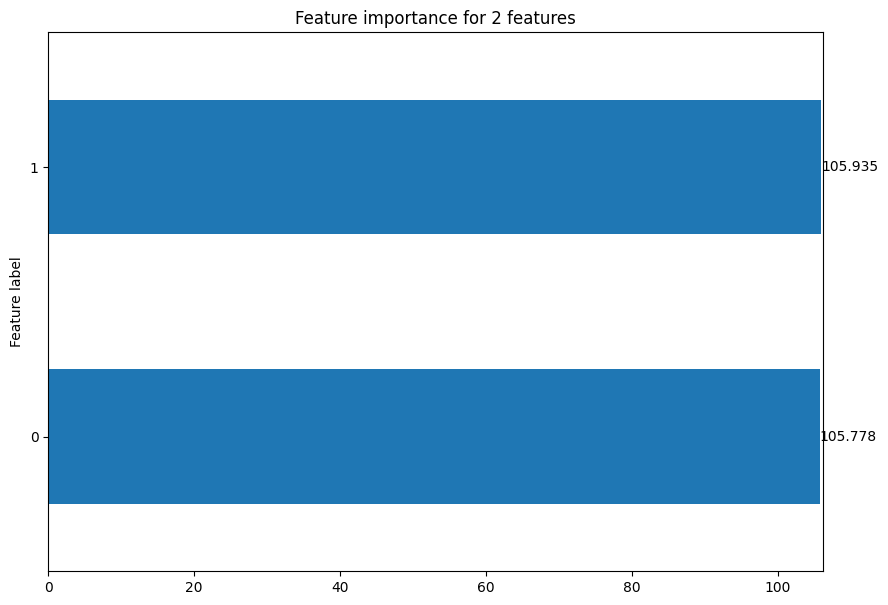

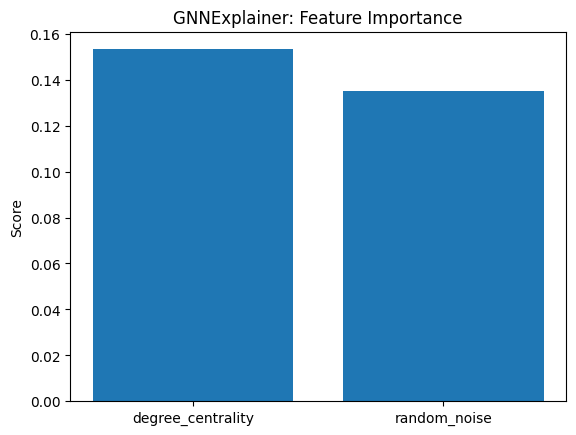

In [165]:
top_features, feature_scores = explain_case(most_similar_idx)

plt.bar(top_features, feature_scores)
plt.title("GNNExplainer: Feature Importance")
plt.ylabel("Score")
plt.show()